Accuracy: 1.0


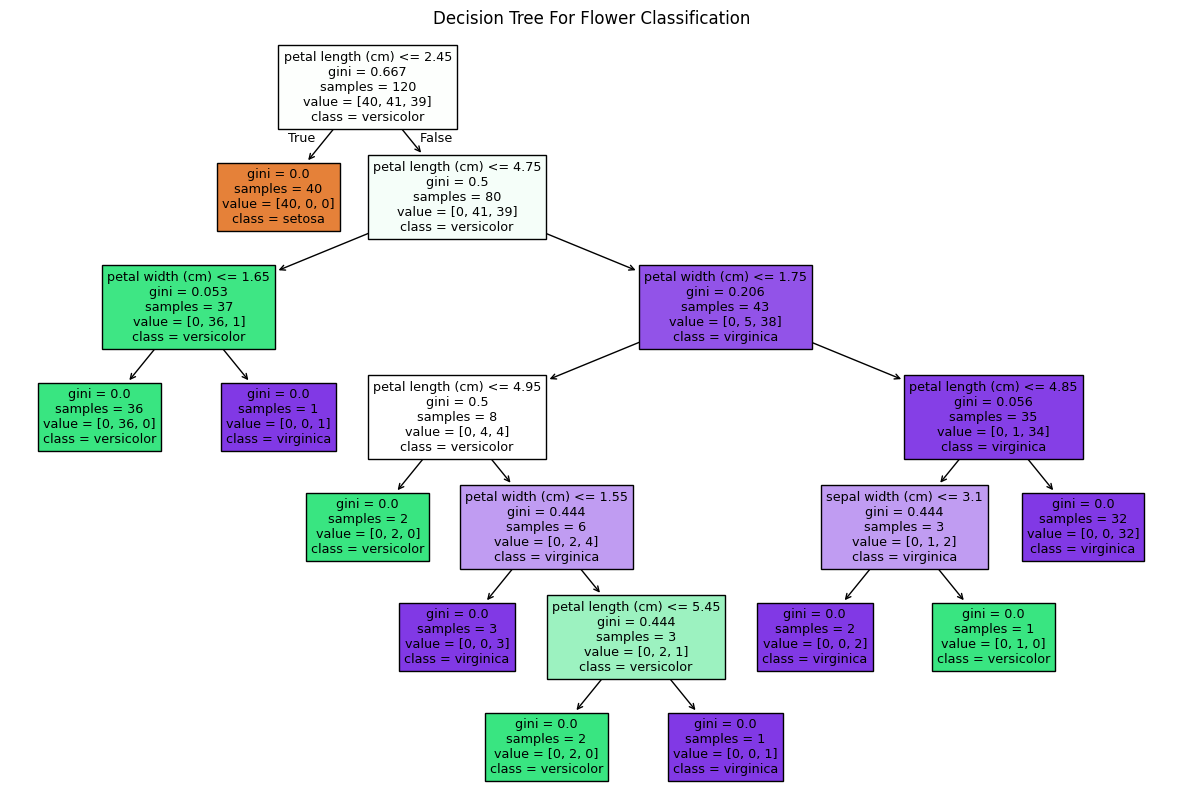

In [8]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree Classifier
clf.fit(X_train, y_train)

# Predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = clf.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

# Plot the decision tree (optional)
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Decision Tree For Flower Classification")
plt.show()


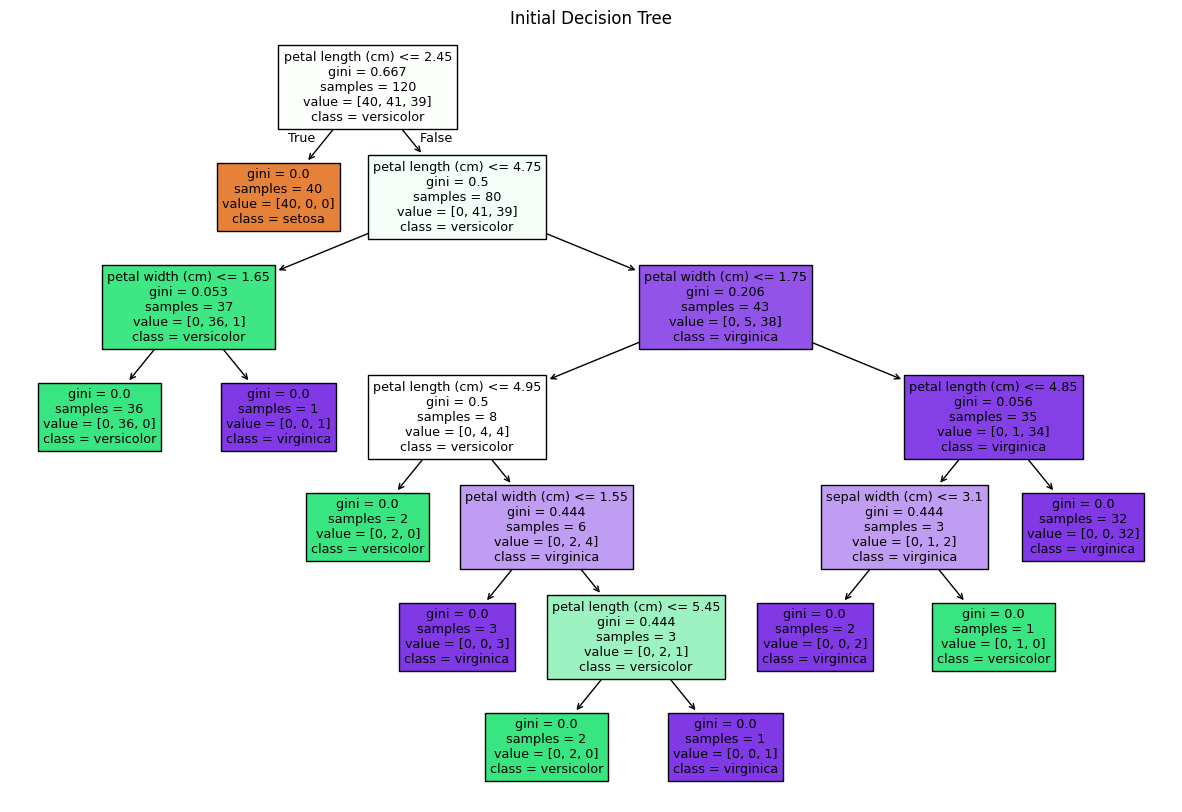

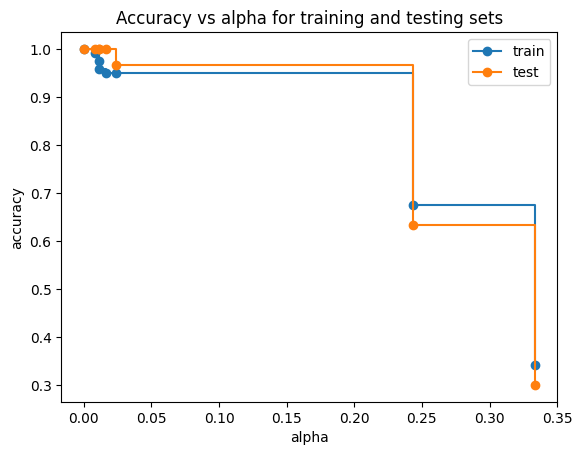

Best alpha: 0.0


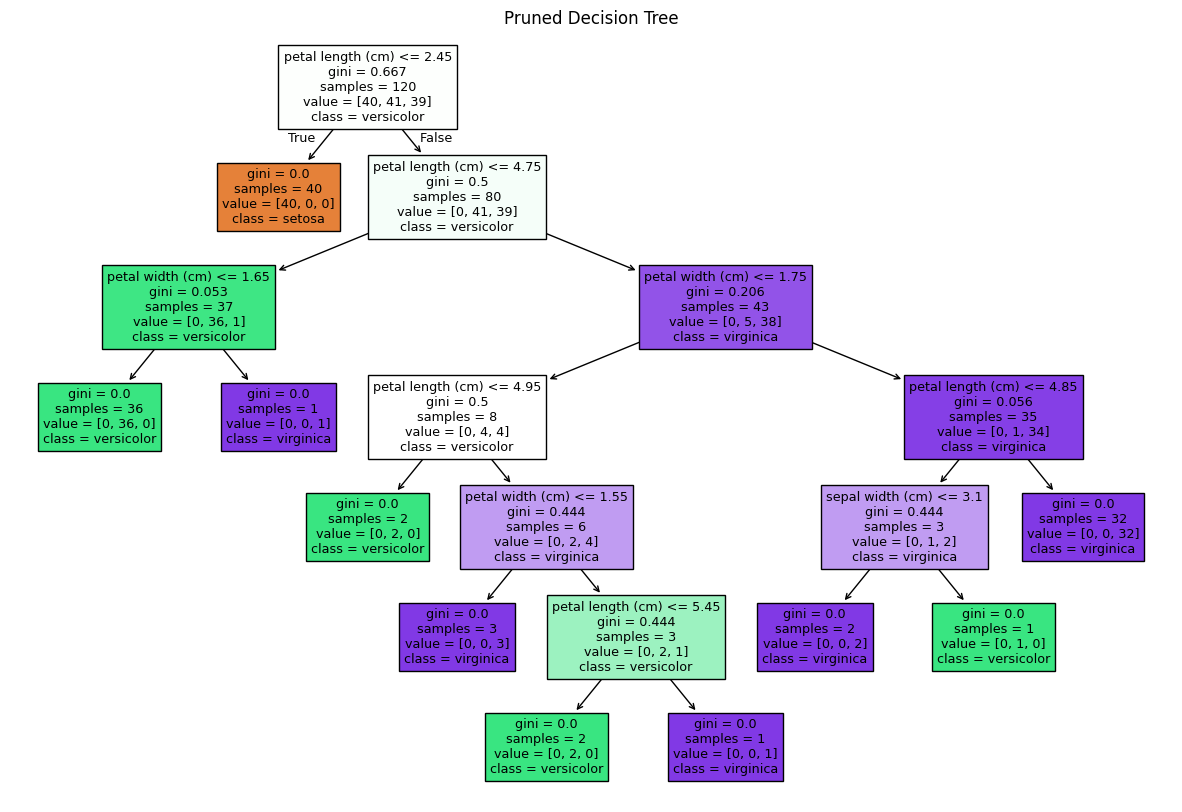

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize DecisionTreeClassifier without specifying max_depth
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Visualize the initial decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Initial Decision Tree")
plt.show()

# Pruning using cost complexity pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train decision trees with different ccp_alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

# Determine the best ccp_alpha value
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test", drawstyle="steps-post")
ax.legend()
plt.show()

# Choose the best model based on test accuracy
best_alpha = ccp_alphas[test_scores.index(max(test_scores))]
print(f"Best alpha: {best_alpha}")

# Final pruned decision tree model
final_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
final_clf.fit(X_train, y_train)

# Visualize the pruned decision tree
plt.figure(figsize=(15, 10))
plot_tree(final_clf, filled=True, feature_names=iris.feature_names, class_names=iris.target_names)
plt.title("Pruned Decision Tree")
plt.show()


Accuracy: 0.73
Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  6  7]]


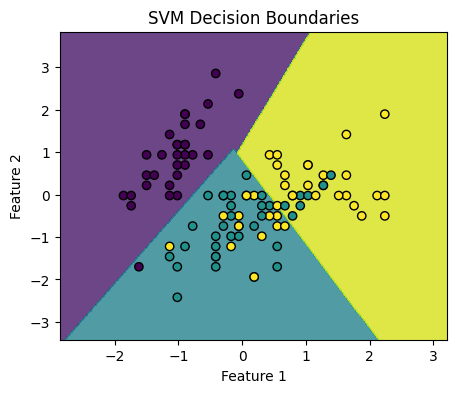

In [11]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Only take the first two features for simplicity
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an SVM classifier with a linear kernel
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

# Plot decision boundaries
def plot_decision_boundaries(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5, 4))
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundaries')
    plt.show()

# Plot the decision boundaries
plot_decision_boundaries(X_train, y_train, svm)


In [14]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Example data: [height (cm), weight (kg)]
X = np.array([
    [170, 65], [165, 58], [180, 75], [175, 70], [160, 55],
    [185, 80], [155, 50], [190, 90], [170, 72], [168, 65]
])

# Labels: 0 = Female, 1 = Male
y = np.array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0])

k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Example of predicting the class for a new data point
new_data = np.array([[172, 68]])
prediction = knn.predict(new_data)

print(f"Predicted class : {'Male' if prediction == 1 else 'Female'}")

Predicted class : Male
